<a href="https://colab.research.google.com/github/Greta-gerasimov/NN/blob/NN2/NN_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [250]:
!pip install keras
!pip install mnist
!pip install scikeras[tensorflow]

In [251]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import Adam

### Building model for digit recognition

In [252]:
#import images
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()



In [253]:
print(train_imagesi[0].shape)

(28, 28)


In [254]:

print(test_labels.shape)

print(train_labels[0])

(10000,)
9


In [255]:
print(train_imagesi[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

(-0.5, 27.5, 27.5, -0.5)

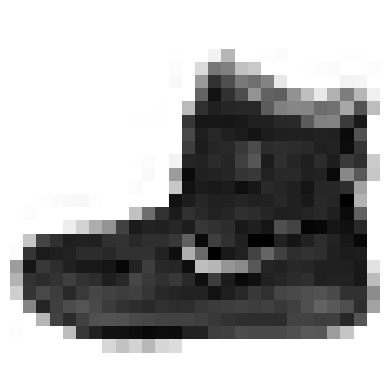

In [256]:
plt.imshow(train_imagesi[0], cmap = 'binary')
plt.axis('off')

In [257]:
# Normalize the images.
train_imagesi = (train_imagesi / 127) -1
test_imagesi = (test_imagesi / 127)-1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

In [258]:
print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


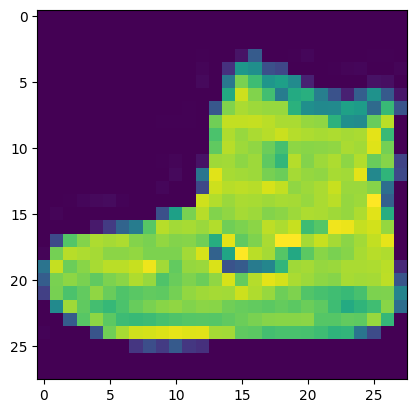

9


In [259]:
plt.imshow(train_imagesi[0])
plt.show()
print(train_labels[0])

In [260]:
train_images[202,:]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.88188976, -0.36220472, -0.63779528, -0.62992126,
       -0.45669291, -0.79527559, -1.        , -1.        , -1.        ,
       -0.99212598, -0.99212598, -1.        , -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.99212598, -0.98425197, -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -0.97637795, -0.77952756,
        0.22834646,  0.30708661,  0.31496063,  0.31496063, -0.5984252 ,
       -1.        , -1.        , -1.        , -1.        , -0.99212598,
       -1.        , -0.99212598, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.98425197, -1.        , -1.        , -0.92125984, -0.70866142,
       -0.54330709, -0.4015748 , -0.83464567, -0.2519685 ,  0.94

In [261]:
y_train = keras.utils.to_categorical(train_labels,10)
y_test = keras.utils.to_categorical(test_labels,10)

#Модель 3-слойной нейронной сети##





In [262]:
# Build the model.
result_dense = []

plt.figure(figsize=(16,7))
# Build the model.

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)
def create_model(optimizer='adam'):
      model3 = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(256, activation='relu'),
      Dense(10, activation ='softmax'),
    ])

    # Compile the model.
      model3.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )


      return model3
model3 = create_model()

# Train the model
history3 = model3.fit(
          train_images,
          to_categorical(train_labels,10),
          epochs =15,
          batch_size = 500, validation_split =0.2)
 #Evaluate the model
test_scores3 = model3.evaluate(
          test_images,
          to_categorical(test_labels)
      )

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])




Epoch 1/15
96/96 [==============================] - 3s 8ms/step - loss: 0.6333 - accuracy: 0.7740 - val_loss: 0.4635 - val_accuracy: 0.8299
Epoch 2/15
96/96 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8527 - val_loss: 0.3944 - val_accuracy: 0.8600
Epoch 3/15
96/96 [==============================] - 1s 9ms/step - loss: 0.3688 - accuracy: 0.8673 - val_loss: 0.3859 - val_accuracy: 0.8607
Epoch 4/15
96/96 [==============================] - 1s 8ms/step - loss: 0.3403 - accuracy: 0.8766 - val_loss: 0.3589 - val_accuracy: 0.8684
Epoch 5/15
96/96 [==============================] - 1s 7ms/step - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.3534 - val_accuracy: 0.8730
Epoch 6/15
96/96 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8904 - val_loss: 0.3518 - val_accuracy: 0.8726
Epoch 7/15
96/96 [==============================] - 0s 4ms/step - loss: 0.2909 - accuracy: 0.8943 - val_loss: 0.3326 - val_accuracy: 0.8805
Epoch 8/15
96/96 [==

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

In [263]:
# Predict on the first 10 test images.
predictions = model3.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 126ms/step
Predictions: [9 2 1 1 6 1 4 6 5 7]
True labels: [9 2 1 1 6 1 4 6 5 7]


##построение модели 2- слойной нейронной сети#

In [264]:
# Build the model.

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)
def create_model(optimizer='adam'):
      model2 = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(256, activation='relu'),
      Dense(10, activation ='softmax'),
    ])

    # Compile the model.
      model2.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )


      return model2
model2 = create_model()

# Train the model
history2 = model2.fit(
          train_images,
          to_categorical(train_labels,10),
          epochs =15,
          batch_size = 500, validation_split =0.2)
 #Evaluate the model
test_scores2 = model2.evaluate(
          test_images,
          to_categorical(test_labels)
      )

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history2.history['accuracy'][epochs-1]
mod_val_accuracy = history2.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])




Epoch 1/15
96/96 [==============================] - 2s 7ms/step - loss: 0.6374 - accuracy: 0.7764 - val_loss: 0.4469 - val_accuracy: 0.8363
Epoch 2/15
96/96 [==============================] - 1s 7ms/step - loss: 0.4183 - accuracy: 0.8491 - val_loss: 0.3929 - val_accuracy: 0.8580
Epoch 3/15
96/96 [==============================] - 1s 7ms/step - loss: 0.3692 - accuracy: 0.8661 - val_loss: 0.3698 - val_accuracy: 0.8674
Epoch 4/15
96/96 [==============================] - 1s 6ms/step - loss: 0.3381 - accuracy: 0.8770 - val_loss: 0.3533 - val_accuracy: 0.8741
Epoch 5/15
96/96 [==============================] - 1s 6ms/step - loss: 0.3211 - accuracy: 0.8834 - val_loss: 0.3543 - val_accuracy: 0.8723
Epoch 6/15
96/96 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8881 - val_loss: 0.3360 - val_accuracy: 0.8790
Epoch 7/15
96/96 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.8978 - val_loss: 0.3379 - val_accuracy: 0.8783
Epoch 8/15
96/96 [==

<Figure size 1600x700 with 0 Axes>

In [265]:
# Predict on the first 10 test images.
predictions = model2.predict(test_images[10:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[10:20]}')

1/1 [==============================] - 0s 85ms/step
Predictions: [4 5 7 3 4 1 2 2 8 0]
True labels: [4 5 7 3 4 1 2 4 8 0]


#Модель 5-слойной нейронной сети##

In [266]:
# Build the model.

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)
def create_model(optimizer='adam'):
      model5 = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='tanh'),
      Dense(110, activation='sigmoid'),
      Dense(64, activation='sigmoid'),
      Dense(10, activation ='softmax'),
    ])

    # Compile the model.
      model5.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )


      return model5
model5 = create_model()

# Train the model
history5 = model5.fit(
          train_images,
          to_categorical(train_labels,10),
          epochs =15,
          batch_size = 500, validation_split =0.2)
 #Evaluate the model
test_scores5 = model5.evaluate(
          test_images,
          to_categorical(test_labels)
      )

# накопление результатов
mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])


Epoch 1/15
96/96 [==============================] - 7s 13ms/step - loss: 1.3969 - accuracy: 0.6421 - val_loss: 0.7759 - val_accuracy: 0.7892
Epoch 2/15
96/96 [==============================] - 1s 7ms/step - loss: 0.6067 - accuracy: 0.8220 - val_loss: 0.4994 - val_accuracy: 0.8449
Epoch 3/15
96/96 [==============================] - 1s 9ms/step - loss: 0.4532 - accuracy: 0.8544 - val_loss: 0.4347 - val_accuracy: 0.8578
Epoch 4/15
96/96 [==============================] - 1s 8ms/step - loss: 0.3903 - accuracy: 0.8719 - val_loss: 0.4037 - val_accuracy: 0.8599
Epoch 5/15
96/96 [==============================] - 1s 12ms/step - loss: 0.3534 - accuracy: 0.8794 - val_loss: 0.3879 - val_accuracy: 0.8641
Epoch 6/15
96/96 [==============================] - 1s 8ms/step - loss: 0.3349 - accuracy: 0.8854 - val_loss: 0.3666 - val_accuracy: 0.8720
Epoch 7/15
96/96 [==============================] - 1s 10ms/step - loss: 0.3088 - accuracy: 0.8930 - val_loss: 0.3576 - val_accuracy: 0.8736
Epoch 8/15
96/96 

<Figure size 1600x700 with 0 Axes>

In [267]:
# Predict on the first 10 test images.
predictions = model5.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')


1/1 [==============================] - 0s 115ms/step
Predictions: [9 2 1 1 6 1 4 6 5 7]
True labels: [9 2 1 1 6 1 4 6 5 7]


##построение модели 10 - слойной нейронной сети##

In [268]:
# Build the model.

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)
def create_model(optimizer='adam'):
      model10 = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='tanh'),
      Dense(110, activation='tanh'),
      Dense(256, activation='sigmoid'),
      Dense(10, activation ='softmax'),
      Dense(256, activation='relu'),
      Dense(128, activation='tanh'),
      Dense(110, activation='tanh'),
      Dense(128, activation='sigmoid'),
      Dense(10, activation ='softmax'),
    ])

    # Compile the model.
      model10.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )


      return model10
model10 = create_model()

# Train the model
history10 = model10.fit(
          train_images,
          to_categorical(train_labels,10),
          epochs =15,
          batch_size = 500, validation_split =0.2)
 #Evaluate the model
test_scores10 = model5.evaluate(
          test_images,
          to_categorical(test_labels)
      )

# накопление результатов
mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])


Epoch 1/15
96/96 [==============================] - 6s 10ms/step - loss: 1.8005 - accuracy: 0.2626 - val_loss: 1.3180 - val_accuracy: 0.3932
Epoch 2/15
96/96 [==============================] - 1s 7ms/step - loss: 1.0460 - accuracy: 0.5970 - val_loss: 0.8112 - val_accuracy: 0.7103
Epoch 3/15
96/96 [==============================] - 1s 7ms/step - loss: 0.7131 - accuracy: 0.7333 - val_loss: 0.6166 - val_accuracy: 0.7793
Epoch 4/15
96/96 [==============================] - 1s 6ms/step - loss: 0.5523 - accuracy: 0.8038 - val_loss: 0.5933 - val_accuracy: 0.7953
Epoch 5/15
96/96 [==============================] - 1s 6ms/step - loss: 0.4829 - accuracy: 0.8383 - val_loss: 0.4819 - val_accuracy: 0.8446
Epoch 6/15
96/96 [==============================] - 1s 6ms/step - loss: 0.4294 - accuracy: 0.8599 - val_loss: 0.4451 - val_accuracy: 0.8565
Epoch 7/15
96/96 [==============================] - 1s 6ms/step - loss: 0.3950 - accuracy: 0.8707 - val_loss: 0.4300 - val_accuracy: 0.8619
Epoch 8/15
96/96 [=

<Figure size 1600x700 with 0 Axes>

In [269]:
# Predict on the first 10 test images.
predictions = model10.predict(test_images[10:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[10:20]}')

1/1 [==============================] - 0s 104ms/step
Predictions: [4 5 5 3 4 1 2 2 8 0]
True labels: [4 5 7 3 4 1 2 4 8 0]


Text(0.5, 1.0, 'Потери от эпох')

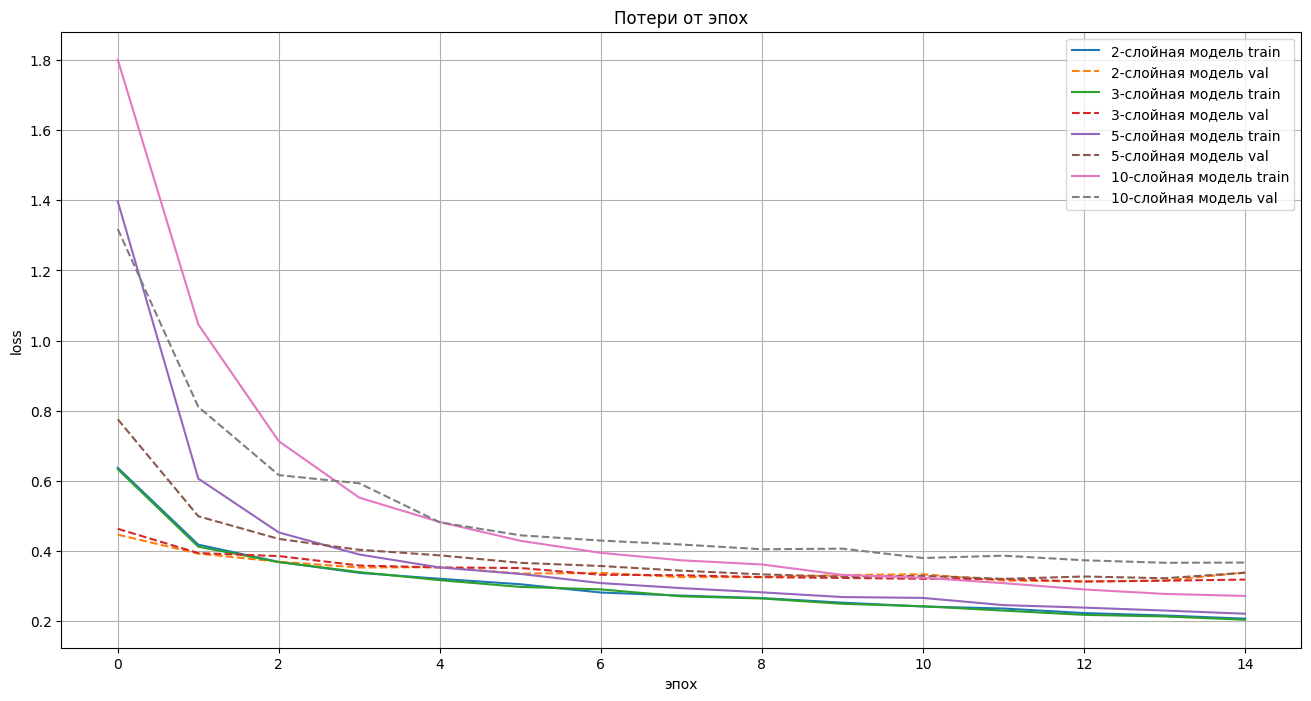

In [270]:
plt.figure(figsize=(16, 8))

plt.plot(history2.history['loss'],'-', label='2-слойная модель train')
plt.plot(history2.history['val_loss'],'--', label='2-слойная модель val')
plt.plot(history3.history['loss'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label='3-слойная модель val')
plt.plot(history5.history['loss'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label='5-слойная модель val')
plt.plot(history10.history['loss'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')

Text(0.5, 1.0, 'Accuracy от эпох')

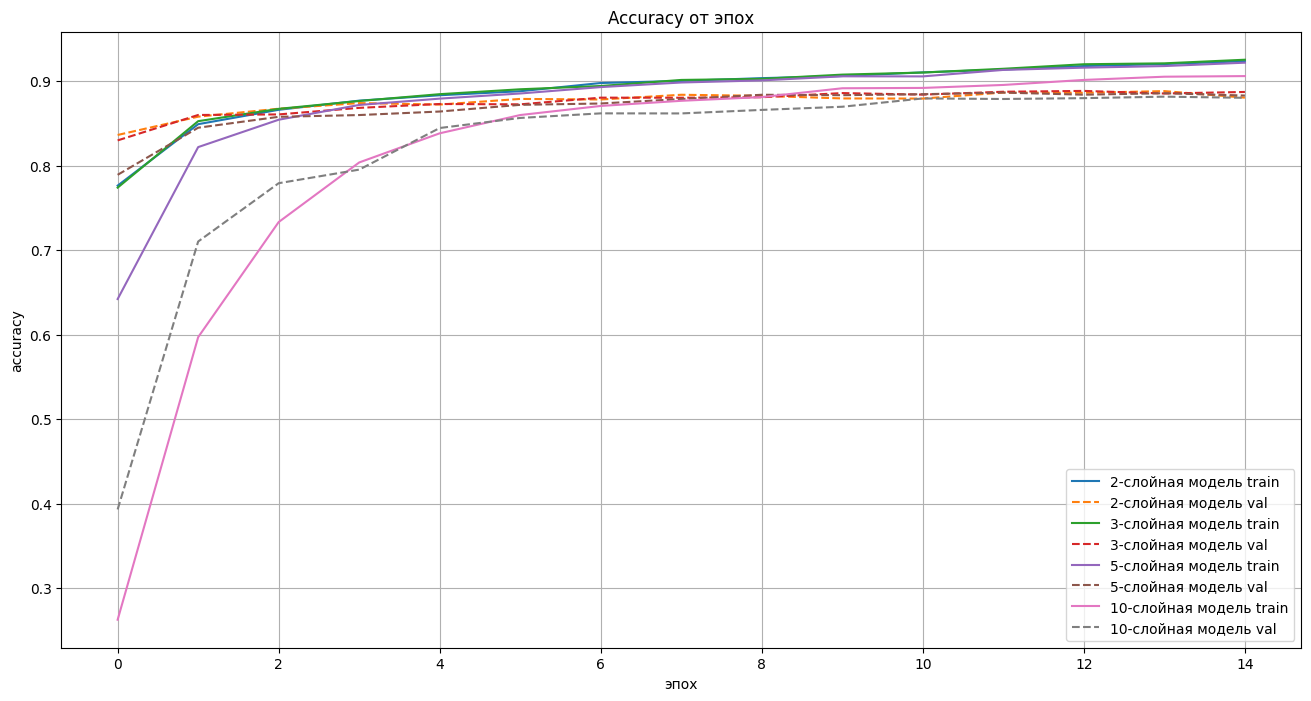

In [271]:
plt.figure(figsize=(16, 8))

plt.plot(history2.history['accuracy'],'-', label='2-слойная модель train')
plt.plot(history2.history['val_accuracy'],'--', label='2-слойная модель val')
plt.plot(history3.history['accuracy'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label='3-слойная модель val')
plt.plot(history5.history['accuracy'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label='5-слойная модель val')
plt.plot(history10.history['accuracy'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy от эпох')

In [272]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
0,2-слойная сеть,0.925396,0.887250,0.8791
2,5-слойная сеть,0.921896,0.883000,0.8750
1,2-слойная сеть,0.923646,0.880500,0.8755
3,10-слойная сеть,0.906021,0.880333,0.8750




**В 2-лойной нейронной сети очевидным образом точность выше, судя по проведенным экспериментам, следовательно ее необходимо взять для исследования оптимизаторов.**

In [273]:
stop = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6) #если функция потерь не изменяется в течение 6 эпох,-ранняя остановка

##Picking params via GridSearchCV##


In [274]:
# Build the model.создание архитектуры нейронной сети
def create_model(optimizer=Adam):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'), #64 neurons
      Dense(32, activation='relu'),
      Dense(10, activation='softmax') #softmax ~ sigmoid - max probability
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer(learning_rate = 0.00024),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [276]:
model= KerasClassifier(create_model)
params= {"batch_size": [1000,5000], "epochs": [5,10], "optimizer": ['SGD', 'RMSprop', 'Adam']}
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, y_train)

print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5
40/40 [==============================] - 1s 4ms/step - loss: 1.6969 - accuracy: 0.4460
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 0.9123 - accuracy: 0.7143
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.7666
Epoch 4/5
40/40 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7943
Epoch 5/5
20/20 [==============================] - 0s 3ms/step
Epoch 1/5
40/40 [==============================] - 1s 4ms/step - loss: 1.6938 - accuracy: 0.4444
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.7095
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.7731
Epoch 4/5
40/40 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.7939
Epoch 5/5
20/20 [==============================] - 0s 2ms/step
Epoch 1/5
40/40 [==============================] - 1s 7ms/step - loss: 1.8743 - accuracy: 0.3739
E

In [277]:
print(grid_result.best_score_, grid_result.best_params_)

0.8427666666666666 {'batch_size': 1000, 'epochs': 10, 'optimizer': 'Adam'}


In [278]:
df = pd.DataFrame(grid_result.cv_results_)

In [279]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
5,1000,10,Adam,0.842767
3,1000,10,SGD,0.842083
4,1000,10,RMSprop,0.842017
1,1000,5,RMSprop,0.814967
2,1000,5,Adam,0.812667
0,1000,5,SGD,0.811317
9,5000,10,SGD,0.761633
10,5000,10,RMSprop,0.754733
11,5000,10,Adam,0.744300
7,5000,5,RMSprop,0.687250


In [281]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=50, batch_size=32,validation_split=0.2,callbacks=[stop])

# Evaluate the model.
loss,metrics = model.evaluate(test_images, y_test)
print('*****************************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,2)}')

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6221 - accuracy: 0.7840 - val_loss: 0.4686 - val_accuracy: 0.8306
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4239 - accuracy: 0.8465 - val_loss: 0.4068 - val_accuracy: 0.8522
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3848 - accuracy: 0.8615 - val_loss: 0.3844 - val_accuracy: 0.8602
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3602 - accuracy: 0.8692 - val_loss: 0.3871 - val_accuracy: 0.8585
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3413 - accuracy: 0.8773 - val_loss: 0.3741 - val_accuracy: 0.8647
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3261 - accuracy: 0.8810 - val_loss: 0.3621 - val_accuracy: 0.8672
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3174 - accuracy: 0.8830 - val_loss: 0.3503 - val_accuracy:

Оценка тестовой выборки

In [283]:
test_pred = np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 0s 1ms/step


In [284]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.85      0.78      1000
           3       0.89      0.86      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.93      0.95      1000
           6       0.76      0.58      0.66      1000
           7       0.91      0.96      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



 Multi-Class Classifications

In [285]:
print(confusion_matrix(test_labels, test_pred))

[[853   1  30  16   4   2  82   0  12   0]
 [  3 969   0  18   6   1   2   0   1   0]
 [ 14   0 852   8  83   1  39   0   3   0]
 [ 32  10  23 858  43   0  29   0   5   0]
 [  0   2 118  26 829   0  23   0   2   0]
 [  0   0   0   0   0 928   0  48   2  22]
 [143   1 144  31  83   0 582   0  16   0]
 [  0   0   0   0   0  18   0 962   0  20]
 [  4   1   9   3   3   5   5   7 963   0]
 [  0   0   0   0   0   7   1  39   0 953]]


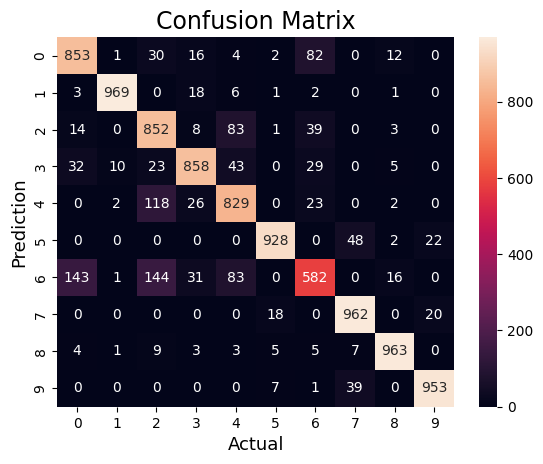

In [286]:
#Plot the confusion matrix.
import seaborn as sns
cm = confusion_matrix(test_labels, test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

результат предсказаний для обученной модели(2 слойная)

1/1 [==============================] - 0s 30ms/step


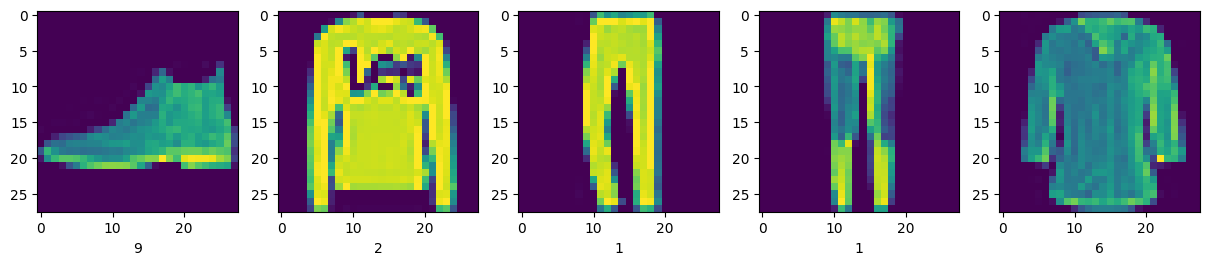

In [287]:
N = 5
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()

##Вывод:


Качество классификации в нейросети  помогла улучшить настройка архитектуры модели:
* подбор ширины скрытого слоя и функции активации
* подбор количества слоев
* подбор количества эпох
* подбор оптимизатора

В данном конкретном эксперименте, мы столкнулись с улучшенной точностью на 2слоях при использовании оптимизатора Adam.